# Better DT viz

https://mljar.com/blog/visualize-decision-tree/

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import dtreeviz

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(
    clf,
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="iris",
    class_names=iris.target_names,
)

v = viz_model.view()  # render as SVG into internal object
# v.save("iris.svg")  # save SVG to file

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

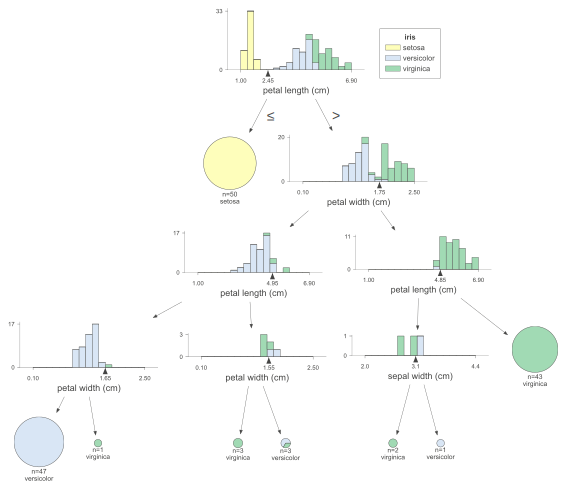

In [3]:
viz_model.view()

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 0 colors were provided

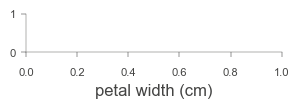

In [13]:
# do the same with a pipeline...DOESNT WORK WITH PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pclf = Pipeline(  # default pipeline for DTC
    steps=[
        ("scaler", StandardScaler()),  # not sure why we need this
        ("dtc", DecisionTreeClassifier(max_depth=4, random_state=0)),
    ],
)
pclf.fit(X, y)

viz_model = dtreeviz.model(
    pclf.named_steps["dtc"],
    X_train=X,
    y_train=y,
    feature_names=iris.feature_names,
    target_name="iris",
    class_names=iris.target_names,
)

v = viz_model.view()  # render as SVG into internal object
# v.save("iris.svg")  # save SVG to file
v